In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#creating a dataframe
cars_train = pd.read_csv(r'cars_train.csv',header=None)
cars_test = pd.read_csv(r'cars_test.csv',header=None)

In [ ]:
print(cars_train.shape)
cars_train.head()

(1382, 7)


,0,1,2,3,4,5,6
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good


In [ ]:
print(cars_test.shape)
cars_test.head()

(346, 7)


,0,1,2,3,4,5,6
0,med,vhigh,5more,4,small,low,unacc
1,vhigh,high,2,2,big,med,unacc
2,low,high,2,more,small,low,unacc
3,vhigh,vhigh,3,2,big,high,unacc
4,low,med,4,4,med,med,good


In [ ]:
cars_train.columns=['buying','maint','doors','persons','lug_boot','safety','classes']
cars_test.columns=['buying','maint','doors','persons','lug_boot','safety','classes']

In [ ]:
cars_train.classes.value_counts()

classes
unacc    959
acc      320
good      56
vgood     47
Name: count, dtype: int64

In [ ]:
cars_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
classes     object
dtype: object

In [ ]:
cars_train.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good


In [ ]:
cars_test.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,med,vhigh,5more,4,small,low,unacc
1,vhigh,high,2,2,big,med,unacc
2,low,high,2,more,small,low,unacc
3,vhigh,vhigh,3,2,big,high,unacc
4,low,med,4,4,med,med,good


In [ ]:
cars_train.describe()

,buying,maint,doors,persons,lug_boot,safety,classes
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,4
top,high,vhigh,5more,more,big,high,unacc
freq,349,352,349,466,467,463,959


In [ ]:
cars_test.describe()

,buying,maint,doors,persons,lug_boot,safety,classes
count,346,346,346,346,346,346,346
unique,4,4,4,3,3,3,4
top,low,low,2,2,med,low,unacc
freq,94,94,92,122,122,118,251


In [ ]:
cars_train.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

In [ ]:
cars_test.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

In [ ]:
cars_test.drop("classes",axis=1,inplace=True)
cars_test.head()

,buying,maint,doors,persons,lug_boot,safety
0,med,vhigh,5more,4,small,low
1,vhigh,high,2,2,big,med
2,low,high,2,more,small,low
3,vhigh,vhigh,3,2,big,high
4,low,med,4,4,med,med


In [ ]:
cars_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    346 non-null    object
 1   maint     346 non-null    object
 2   doors     346 non-null    object
 3   persons   346 non-null    object
 4   lug_boot  346 non-null    object
 5   safety    346 non-null    object
dtypes: object(6)
memory usage: 16.3+ KB


In [ ]:
#transforming Categorical data to Numerical
from sklearn.preprocessing import LabelEncoder

colname=['buying','maint','doors','persons','lug_boot','safety','classes']

le=LabelEncoder()

for x in colname:
    cars_train[x]=le.fit_transform(cars_train[x])



In [ ]:
cars_train.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,0,1,2,2,1,2
1,1,3,1,1,2,2,2
2,1,0,3,2,0,1,2
3,0,2,2,0,2,2,2
4,1,1,1,2,0,2,1


In [ ]:
#transforming Categorical data to Numerical
from sklearn.preprocessing import LabelEncoder

colname=['buying','maint','doors','persons','lug_boot','safety']

le=LabelEncoder()

for x in colname:
    cars_test[x]=le.fit_transform(cars_test[x])


In [ ]:
cars_test.head()

,buying,maint,doors,persons,lug_boot,safety
0,2,3,3,1,2,1
1,3,0,0,0,0,2
2,1,0,0,2,2,1
3,3,3,1,0,0,0
4,1,2,2,1,1,2


In [ ]:
X=cars_train.values[:,0:-1]
Y=cars_train.values[:,-1]
Y=Y.astype(int)

In [ ]:
X.shape

(1382, 6)

In [ ]:
Y.shape

(1382,)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [ ]:
print(X)

[[ 1.33507272 -1.3488262  -0.45682233  1.21505861  1.22565305  0.00176987]
 [-0.44760409  1.32688358 -0.45682233 -0.01064285  1.22565305  1.22474807]
 [-0.44760409 -1.3488262   1.33418038  1.21505861 -1.21505663  0.00176987]
 ...
 [-1.33894249  1.32688358  1.33418038 -0.01064285  0.00529821 -1.22120833]
 [ 0.44373431  0.43498032  0.43867903 -0.01064285 -1.21505663  0.00176987]
 [ 0.44373431 -0.45692294  1.33418038  1.21505861  1.22565305 -1.22120833]]


In [ ]:
from sklearn.model_selection import train_test_split
#<1000=in range of 80-20  &  >1000=in range of 70-80

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1105, 6)
(1105,)
(277, 6)
(277,)


In [ ]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

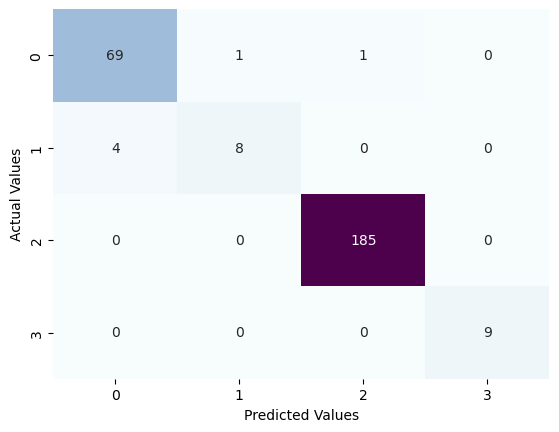

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.89      0.67      0.76        12
           2       0.99      1.00      1.00       185
           3       1.00      1.00      1.00         9

    accuracy                           0.98       277
   macro avg       0.96      0.91      0.93       277
weighted avg       0.98      0.98      0.98       277

Accuracy of the model:  0.9783393501805054


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
model_DecisionTree.score(X_train,Y_train)

1.0

In [ ]:
print(list(zip(cars_train.columns[0:-1],model_DecisionTree.feature_importances_)))

[('buying', 0.21976792783843332), ('maint', 0.18220929667385857), ('doors', 0.062005934167191426), ('persons', 0.19425872158174767), ('lug_boot', 0.09772725134941933), ('safety', 0.24403086838934968)]


In [ ]:
import os
os.getcwd()

'C:\\Users\\Admin\\Downloads'

In [ ]:
from sklearn import tree
with open(r"model_DecisionTree.txt", "w") as f:

    f = tree.export_graphviz(model_DecisionTree, feature_names=cars_train.columns[0:-1],
                             out_file=f)

#generate the file and upload the code in webgraphviz.com to plot the decision tree

### Hyperparameter tuning

In [ ]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10,
                                           splitter="best",min_samples_leaf=5,
                                           max_depth=10,max_leaf_nodes=15)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

![image.png](attachment:image.png)

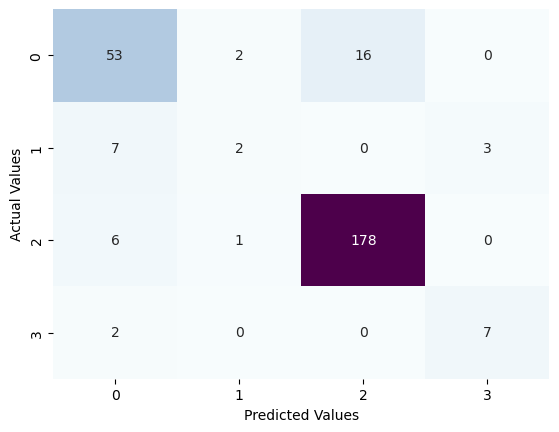

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        71
           1       0.40      0.17      0.24        12
           2       0.92      0.96      0.94       185
           3       0.70      0.78      0.74         9

    accuracy                           0.87       277
   macro avg       0.70      0.66      0.67       277
weighted avg       0.85      0.87      0.86       277

Accuracy of the model:  0.8664259927797834


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [ ]:
model_DecisionTree.score(X_train,Y_train)

0.8552036199095022

In [ ]:
from sklearn import tree
with open(r"model_DecisionTree.txt", "w") as f:

    f = tree.export_graphviz(model_DecisionTree, feature_names=cars_train.columns[0:-1],
                             out_file=f)

#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[2 2 2 2 2 0 2 2 2 0 0 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 3 0 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2
 0 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2]
[(2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 0), (0, 2), (2, 2), (2, 2), (1, 0), (0, 0), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 0), (0, 2), (0, 2), (2, 2), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (0, 3), (2, 0), (0, 2), (1, 2), (2, 2), (2, 0), (2, 2), (0, 2), (2, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 2), (2, 0), (2, 2), (3, 0), (0, 2), (2, 2), (0, 2), (3, 0), (0, 2), (2, 2), (0, 2), (2, 2), (2, 2), (2, 

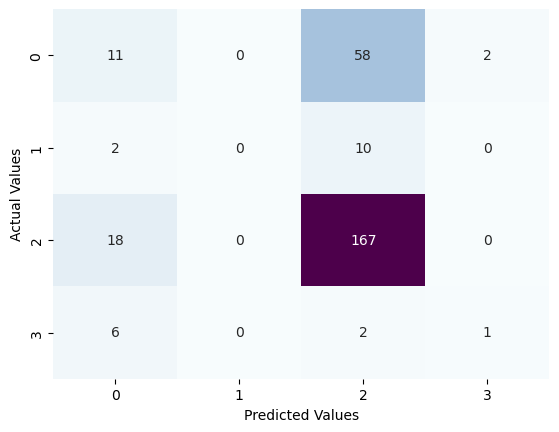

Classification report:
              precision    recall  f1-score   support

           0       0.30      0.15      0.20        71
           1       0.00      0.00      0.00        12
           2       0.70      0.90      0.79       185
           3       0.33      0.11      0.17         9

    accuracy                           0.65       277
   macro avg       0.33      0.29      0.29       277
weighted avg       0.56      0.65      0.59       277

Accuracy of the model:  0.6462093862815884


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

Base model is simpler than the tuned model.


# test data

In [ ]:
cars_test.head()

,buying,maint,doors,persons,lug_boot,safety
0,2,3,3,1,2,1
1,3,0,0,0,0,2
2,1,0,0,2,2,1
3,3,3,1,0,0,0
4,1,2,2,1,1,2


In [ ]:
test=cars_test.values
test=scaler.transform(test)
#print(test)

#fit only on the train data
#transform on both the train as well as test data

In [ ]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)



DecisionTreeClassifier(random_state=10)

In [ ]:
test_pred = model_DecisionTree.predict(test)
test_pred

array([2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 3, 1, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2,
       0, 0, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 3, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 3, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 3, 3, 0, 2,
       0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,

In [ ]:
cars_test = pd.read_csv(r'cars_test.csv',header=None)
cars_test.columns=['buying','maint','doors','persons','lug_boot','safety','classes']
cars_test["Pred"]=test_pred
cars_test["Pred"]=cars_test["Pred"].map({0:"acc",1:"good",2:"unacc",3:"vgood"})
cars_test

,buying,maint,doors,persons,lug_boot,safety,classes,Pred
0,med,vhigh,5more,4,small,low,unacc,unacc
1,vhigh,high,2,2,big,med,unacc,unacc
2,low,high,2,more,small,low,unacc,unacc
3,vhigh,vhigh,3,2,big,high,unacc,unacc
4,low,med,4,4,med,med,good,good
...,...,...,...,...,...,...,...,...
341,high,low,3,4,small,high,acc,acc
342,vhigh,high,3,4,small,high,unacc,unacc
343,med,low,3,2,small,high,unacc,unacc
344,vhigh,med,2,more,small,low,unacc,unacc


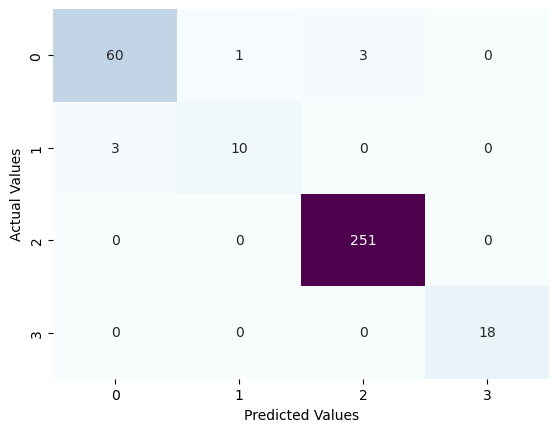

Classification report:
              precision    recall  f1-score   support

         acc       0.95      0.94      0.94        64
        good       0.91      0.77      0.83        13
       unacc       0.99      1.00      0.99       251
       vgood       1.00      1.00      1.00        18

    accuracy                           0.98       346
   macro avg       0.96      0.93      0.94       346
weighted avg       0.98      0.98      0.98       346

Accuracy of the model:  0.9797687861271677


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(cars_test.classes,cars_test.Pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(cars_test.classes,cars_test.Pred))

acc=accuracy_score(cars_test.classes,cars_test.Pred)
print("Accuracy of the model: ",acc)

In [ ]:
log_test = classifier.predict(test)
log_test

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,

In [ ]:
cars_test["Log_Pred"]= log_test
cars_test['Log_Pred']=cars_test['Log_Pred'].map({0:"acc",1:"good",2:"unacc",3:"vgood"})
cars_test

,buying,maint,doors,persons,lug_boot,safety,classes,Pred,Log_Pred
0,med,vhigh,5more,4,small,low,unacc,unacc,unacc
1,vhigh,high,2,2,big,med,unacc,unacc,unacc
2,low,high,2,more,small,low,unacc,unacc,unacc
3,vhigh,vhigh,3,2,big,high,unacc,unacc,unacc
4,low,med,4,4,med,med,good,good,unacc
...,...,...,...,...,...,...,...,...,...
341,high,low,3,4,small,high,acc,acc,unacc
342,vhigh,high,3,4,small,high,unacc,unacc,unacc
343,med,low,3,2,small,high,unacc,unacc,unacc
344,vhigh,med,2,more,small,low,unacc,unacc,unacc


In [ ]:
#Predictions of Decision Tree
cars_test.Pred.value_counts()

Pred
unacc    254
acc       63
vgood     18
good      11
Name: count, dtype: int64

In [ ]:
#Predictions of Logistic Regression
cars_test.Log_Pred.value_counts()

Log_Pred
unacc    301
acc       40
vgood      5
Name: count, dtype: int64

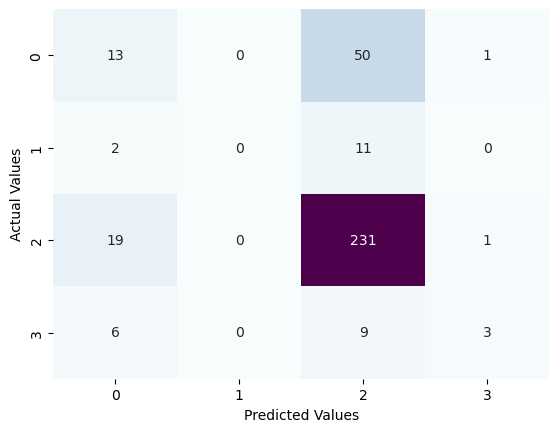

Classification report:
              precision    recall  f1-score   support

         acc       0.33      0.20      0.25        64
        good       0.00      0.00      0.00        13
       unacc       0.77      0.92      0.84       251
       vgood       0.60      0.17      0.26        18

    accuracy                           0.71       346
   macro avg       0.42      0.32      0.34       346
weighted avg       0.65      0.71      0.67       346

Accuracy of the model:  0.7138728323699421


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(cars_test.classes,cars_test.Log_Pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(cars_test.classes,cars_test.Log_Pred))

acc=accuracy_score(cars_test.classes,cars_test.Log_Pred)
print("Accuracy of the model: ",acc)

In [ ]:
#cars_test.to_excel("Decision Test Output.xlxs",header=True)
#Saving the data

# Random Forest

In [ ]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=100,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred = model_RandomForest.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[ 65   1   5   0]
 [  4   8   0   0]
 [  1   0 184   0]
 [  0   0   0   9]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.89      0.67      0.76        12
           2       0.97      0.99      0.98       185
           3       1.00      1.00      1.00         9

    accuracy                           0.96       277
   macro avg       0.95      0.89      0.92       277
weighted avg       0.96      0.96      0.96       277

Accuracy of the model:  0.9602888086642599


In [ ]:
model_RandomForest.score(X_train,Y_train)

1.0